# random tensor learing

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

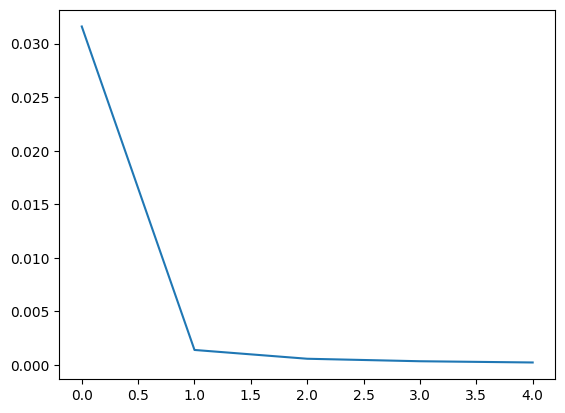

In [91]:
from torch.optim.lr_scheduler import StepLR

x = torch.randn((5,3))
y = torch.randn((5,2))

# Normalizing
# x_min = x.min(dim=0, keepdim=True).values
# x_max = x.max(dim=0, keepdim=True).values
# x_normalized = (x - x_min) / (x_max - x_min)

# y_min = y.min(dim=0, keepdim=True).values
# y_max = y.max(dim=0, keepdim=True).values
# y_normalized = (y - y_min) / (y_max - y_min)

# x = x_normalized; y = y_normalized

# Model prepare
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super(MyNeuralNetwork, self).__init__()
        self.l1 = nn.Linear(3,10)
        self.l2 = nn.Linear(10,2)
    
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x
    
model = MyNeuralNetwork()
criterion = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.1)

scheduler = StepLR(optim, step_size=100, gamma=0.1)


how_many = 100


# Learning
preds = [x]
losses = []
for j in range(5):
    pred = 0; loss = 0
    for i in range(how_many):
        optim.zero_grad()
        pred = model(x)
        loss = criterion(pred, y)
        loss.backward()
        optim.step()

    preds.append(pred)
    losses.append(loss.item())


plt.plot(losses, label="loss")



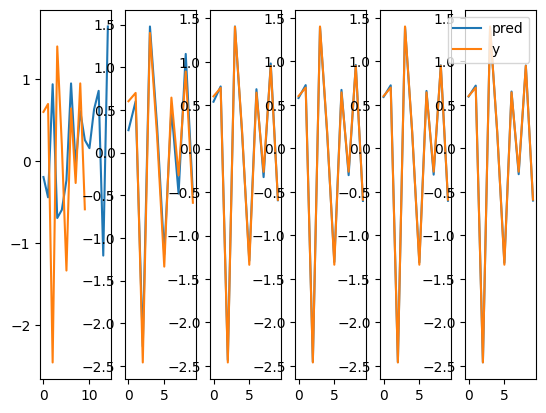

In [92]:
for i in range(6):
    plt.subplot(161+i)
    plt.plot(preds[i].detach().cpu().numpy().reshape(-1), label="pred")
    plt.plot(y.numpy().reshape(-1), label="y")
plt.legend()
plt.show()
